# Desafio 4

Neste desafio, vamos praticar um pouco sobre testes de hipóteses. Utilizaremos o _data set_ [2016 Olympics in Rio de Janeiro](https://www.kaggle.com/rio2016/olympic-games/), que contém dados sobre os atletas das Olimpíadas de 2016 no Rio de Janeiro.

Esse _data set_ conta com informações gerais sobre 11538 atletas como nome, nacionalidade, altura, peso e esporte praticado. Estaremos especialmente interessados nas variáveis numéricas altura (`height`) e peso (`weight`). As análises feitas aqui são parte de uma Análise Exploratória de Dados (EDA).

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns

/home/jonathan/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
%matplotlib inline

from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()

In [3]:
athletes = pd.read_csv("athletes.csv")

In [4]:
def get_sample(df, col_name, n=100, seed=42):
    """Get a sample from a column of a dataframe.
    
    It drops any numpy.nan entries before sampling. The sampling
    is performed without replacement.
    
    Example of numpydoc for those who haven't seen yet.
    
    Parameters
    ----------
    df : pandas.DataFrame
        Source dataframe.
    col_name : str
        Name of the column to be sampled.
    n : int
        Sample size. Default is 100.
    seed : int
        Random seed. Default is 42.
    
    Returns
    -------
    pandas.Series
        Sample of size n from dataframe's column.
    """
    np.random.seed(seed)
    
    random_idx = np.random.choice(df[col_name].dropna().index, size=n, replace=False)
    
    return df.loc[random_idx, col_name]

## Inicia sua análise a partir daqui

In [5]:
# Sua análise começa aqui.
df = athletes.copy()
df.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11538 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           11538 non-null  int64  
 1   name         11538 non-null  object 
 2   nationality  11538 non-null  object 
 3   sex          11538 non-null  object 
 4   dob          11537 non-null  object 
 5   height       11208 non-null  float64
 6   weight       10879 non-null  float64
 7   sport        11538 non-null  object 
 8   gold         11538 non-null  int64  
 9   silver       11538 non-null  int64  
 10  bronze       11538 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 991.7+ KB


In [7]:
df['gold'].value_counts()

0    10919
1      584
2       27
3        5
4        2
5        1
Name: gold, dtype: int64

In [8]:
df['silver'].value_counts()

0    10904
1      613
2       21
Name: silver, dtype: int64

In [9]:
df['bronze'].value_counts()

0    10845
1      682
2       11
Name: bronze, dtype: int64

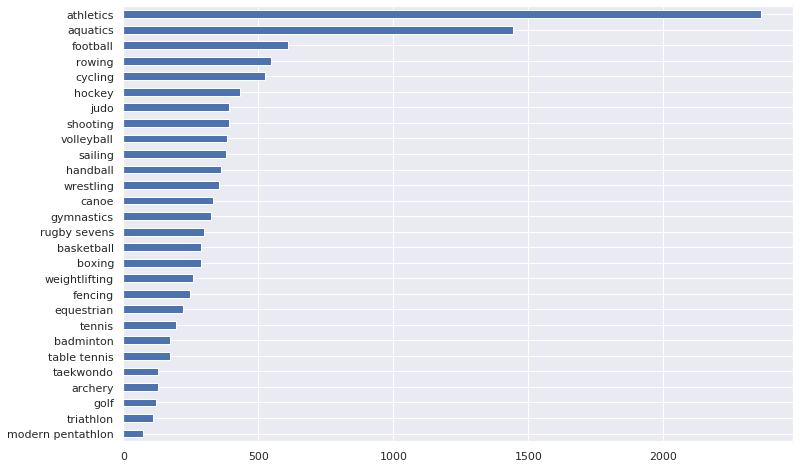

In [10]:
df['sport'].value_counts().sort_values().plot(kind = 'barh')

## Questão 1

Considerando uma amostra de tamanho 3000 da coluna `height` obtida com a função `get_sample()`, execute o teste de normalidade de Shapiro-Wilk com a função `scipy.stats.shapiro()`. Podemos afirmar que as alturas são normalmente distribuídas com base nesse teste (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [11]:
#sample
sample = get_sample(df,'height', n =3000)

In [12]:
from scipy.stats import shapiro
def q1():
    statistic,p = shapiro(sample)
    print(f'P-value: {p}')
    print(f'Statistics: {statistic}')
    #For a threshold of 5% (alpha)
    if p > 0.05:
        #print(f'Sample looks Gaussian (fail to regect H0)')
        return True
    else:
        #print(f'Sample does not look gaussian ( regect H0)')
        return False

In [13]:
q1()

P-value: 5.681722541339695e-07
Statistics: 0.9961519837379456


False

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?

R: Para confirmar a normalidade de uma distribuição devemos fazer tanto uma análise quantitativa, como o shapiro-wilk test, quanto uma análise qualitativa como análise de histograma e Q-Q plot. A hipotese de normalidade deve ser garantida nas duas formas. 



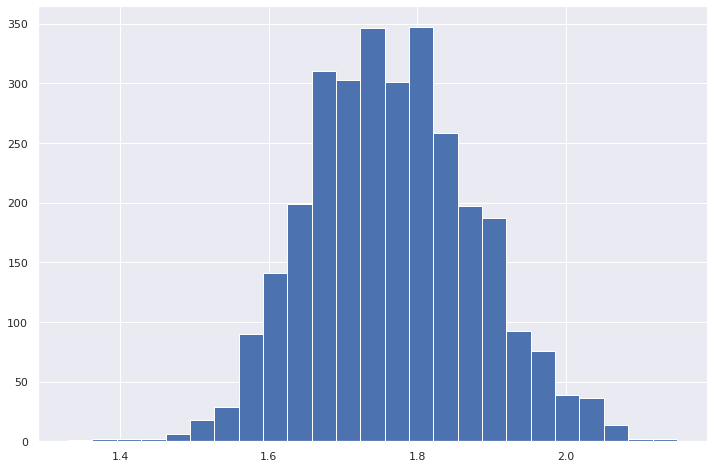

In [14]:
sample.hist(bins = 25)

* Plote o qq-plot para essa variável e a analise.


Apesar dos dot points acompanharem a maior parte da linearidade da reta que representa a normalidade, podemos ver que na tail da distribuição temos uma dispersao dos dados. Isso é um indicativo de não normalidade da distribuição.

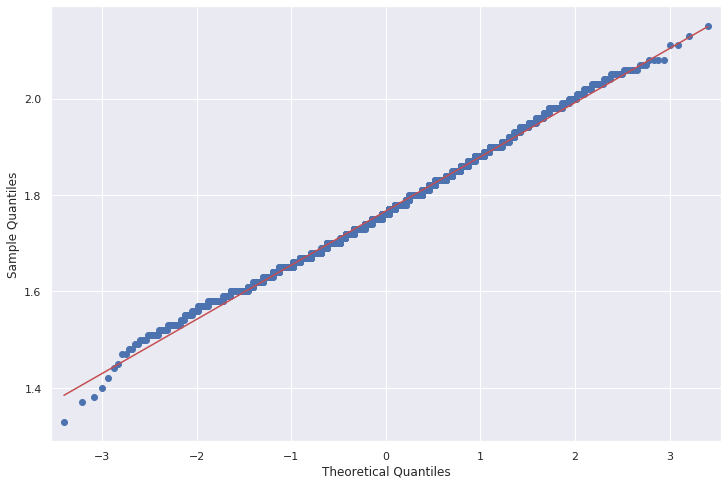

In [15]:
# qqplot
from statsmodels.graphics.gofplots import qqplot
qqplot(sample, line = 's') ; 

* Existe algum nível de significância razoável que nos dê outro resultado no teste? (Não faça isso na prática. Isso é chamado _p-value hacking_, e não é legal).



## Questão 2

Repita o mesmo procedimento acima, mas agora utilizando o teste de normalidade de Jarque-Bera através da função `scipy.stats.jarque_bera()`. Agora podemos afirmar que as alturas são normalmente distribuídas (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [16]:
from scipy.stats import jarque_bera
def q2():
    statistic,p = jarque_bera(sample)
    print(f'P-value: {p}')
    print(f'Statistics: {statistic}')
    #For a threshold of 5% (alpha)
    if p > 0.05:
        #print(f'Sample looks Gaussian (fail to regect H0)')
        return True
    else:
        #print(f'Sample does not look gaussian ( regect H0)')
        return False

In [17]:
q2()

P-value: 0.001478366424594868
Statistics: 13.03363513594265


False

__Para refletir__:

* Esse resultado faz sentido?

Sim. Corrobora com o resultado anterior 


## Questão 3

Considerando agora uma amostra de tamanho 3000 da coluna `weight` obtida com a função `get_sample()`. Faça o teste de normalidade de D'Agostino-Pearson utilizando a função `scipy.stats.normaltest()`. Podemos afirmar que os pesos vêm de uma distribuição normal ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [18]:
#sample
weight_sample = get_sample(df,'weight', n =3000)

In [25]:
from scipy.stats import normaltest
def q3():
    statistic,p = normaltest(weight_sample)
    print(f'P-value: {p}')
    print(f'Statistics: {statistic}')
    #For a threshold of 5% (alpha)
    if p > 0.05:
        #print(f'Sample looks Gaussian (fail to regect H0)')
        return True
    else:
        #print(f'Sample does not look gaussian ( regect H0)')
        return False

In [26]:
q3()

P-value: 1.5898922918029537e-111
Statistics: 510.24655809881176


False

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?

Sim. A distribuição é notoriamente assimétrica.


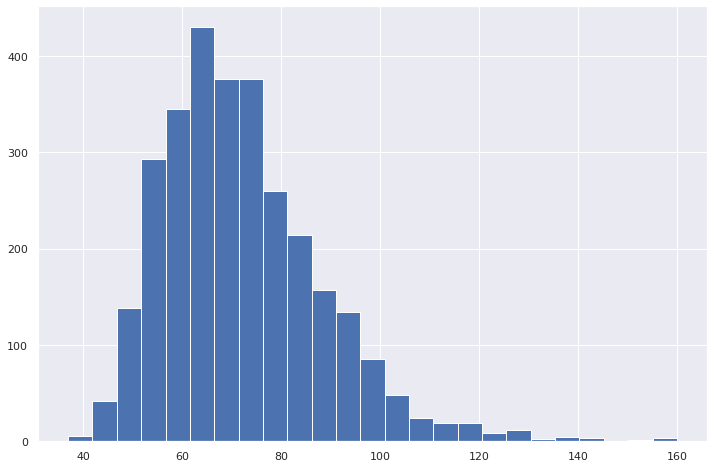

In [24]:
weight_sample.hist(bins = 25)

* Um _box plot_ também poderia ajudar a entender a resposta.

## Questão 4

Realize uma transformação logarítmica em na amostra de `weight` da questão 3 e repita o mesmo procedimento. Podemos afirmar a normalidade da variável transformada ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [27]:
log_weight_sample =np.log(weight_sample)

In [28]:
from scipy.stats import normaltest
def q4():
    statistic,p = normaltest(log_weight_sample)
    print(f'P-value: {p}')
    print(f'Statistics: {statistic}')
    #For a threshold of 5% (alpha)
    if p > 0.05:
        #print(f'Sample looks Gaussian (fail to regect H0)')
        return True
    else:
        #print(f'Sample does not look gaussian ( regect H0)')
        return False

In [29]:
q4()

P-value: 1.0705572101256944e-10
Statistics: 45.91534331977353


False

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?

Sim. Fazendo uma análise qualitativa podemos ver que a distribuição parece normal porem a transformação nao garante a normalidade da mesma. 


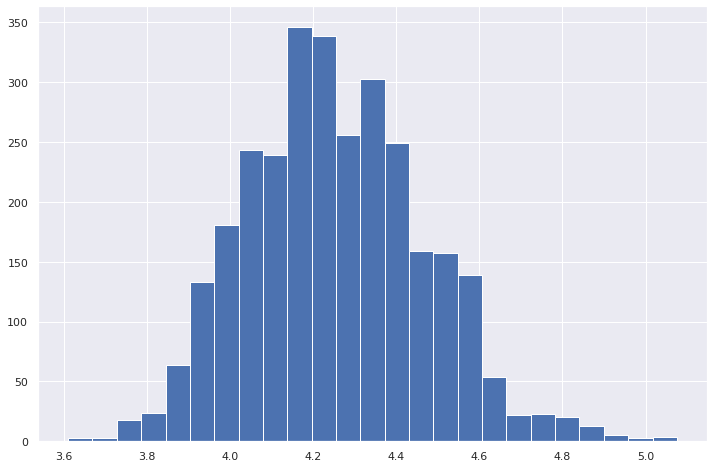

In [30]:
log_weight_sample.hist(bins = 25)

* Você esperava um resultado diferente agora?

> __Para as questão 5 6 e 7 a seguir considere todos testes efetuados ao nível de significância de 5%__.

## Questão 5

Obtenha todos atletas brasileiros, norte-americanos e canadenses em `DataFrame`s chamados `bra`, `usa` e `can`,respectivamente. Realize um teste de hipóteses para comparação das médias das alturas (`height`) para amostras independentes e variâncias diferentes com a função `scipy.stats.ttest_ind()` entre `bra` e `usa`. Podemos afirmar que as médias são estatisticamente iguais? Responda com um boolean (`True` ou `False`).

In [32]:
# Filter dataframes
bra = df.loc[df.nationality == 'BRA', :]
usa = df.loc[df.nationality == 'USA', :]
can = df.loc[df.nationality == 'CAN', :]

In [40]:
from scipy.stats import ttest_ind
def q5():
    # Hypothesis test
    hypothesis_test = ttest_ind(bra['height'],
                                usa['height'],
                               equal_var = False,
                               nan_policy='omit')
    print(f'statistic:',hypothesis_test[0])
    print(f'p-value:',hypothesis_test[1])
     #For a threshold of 5% (alpha)
    if hypothesis_test[0] > 0.05:
        #print(f'Sample looks Gaussian (fail to regect H0)')
        return True
    else:
        #print(f'Sample does not look gaussian ( regect H0)')
        return False
    
    

In [41]:
q5()

statistic: -3.2232436467501855
p-value: 0.0013080041830140115


False

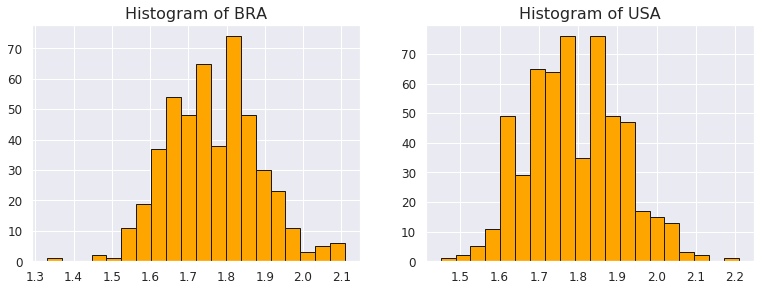

In [69]:
i=1
nationality = ['BRA','USA','CAN']


plt.figure(figsize=(20,20))
for c in nationality[:2]:
    filtered_df = df.loc[df.nationality == c, :]
    plt.subplot(4,3,i)
    plt.title(f"Histogram of {c}",fontsize=16)
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12)
    plt.hist(filtered_df['height'],bins=20,color='orange',edgecolor='k')
    i+=1
plt.show();

## Questão 6

Repita o procedimento da questão 5, mas agora entre as alturas de `bra` e `can`. Podemos afimar agora que as médias são estatisticamente iguais? Reponda com um boolean (`True` ou `False`).

In [42]:
from scipy.stats import ttest_ind
def q6():
    # Hypothesis test
    hypothesis_test = ttest_ind(bra['height'],
                                can['height'],
                               equal_var = False,
                               nan_policy='omit')
    print(f'statistic:',hypothesis_test[0])
    print(f'p-value:',hypothesis_test[1])
     #For a threshold of 5% (alpha)
    if hypothesis_test[0] > 0.05:
        #print(f'Sample looks Gaussian (fail to regect H0)')
        return True
    else:
        #print(f'Sample does not look gaussian ( regect H0)')
        return False

In [44]:
q6()

statistic: 0.6389304914365109
p-value: 0.5230827295440921


True

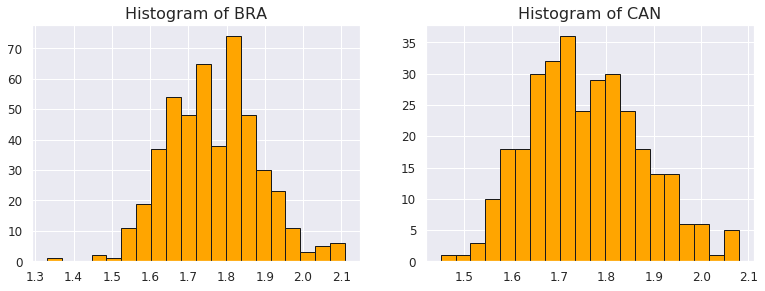

In [70]:
i=1
nationality = ['BRA','CAN']


plt.figure(figsize=(20,20))
for c in nationality:
    filtered_df = df.loc[df.nationality == c, :]
    plt.subplot(4,3,i)
    plt.title(f"Histogram of {c}",fontsize=16)
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12)
    plt.hist(filtered_df['height'],bins=20,color='orange',edgecolor='k')
    i+=1
plt.show();

## Questão 7

Repita o procedimento da questão 6, mas agora entre as alturas de `usa` e `can`. Qual o valor do p-valor retornado? Responda como um único escalar arredondado para oito casas decimais.

In [47]:
from scipy.stats import ttest_ind
def q7():
    # Hypothesis test
    hypothesis_test = ttest_ind(usa['height'],
                                can['height'],
                               equal_var = False,
                               nan_policy='omit')
    print(f'statistic:',hypothesis_test[0])
    print(f'p-value:',hypothesis_test[1])
    
    return np.round(hypothesis_test[1],8)
  
    

In [48]:
q7()

statistic: 3.516987632488539
p-value: 0.0004660129347389851


0.00046601

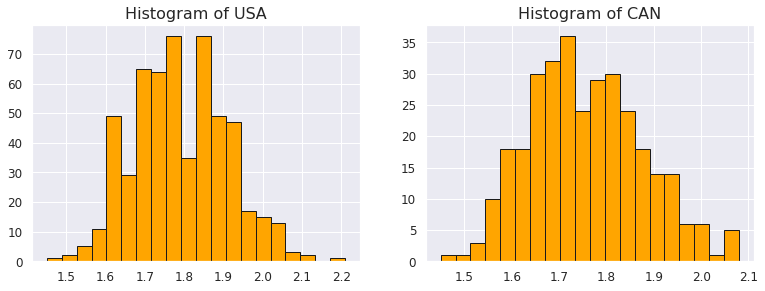

In [71]:
i=1
nationality = ['USA','CAN']


plt.figure(figsize=(20,20))
for c in nationality:
    filtered_df = df.loc[df.nationality == c, :]
    plt.subplot(4,3,i)
    plt.title(f"Histogram of {c}",fontsize=16)
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12)
    plt.hist(filtered_df['height'],bins=20,color='orange',edgecolor='k')
    i+=1
plt.show();

__Para refletir__:

* O resultado faz sentido?

Sim. Calculando as médias de cada nacionalidadec, podecmos observar que os americanos possuem maior média dec altura e canadenses e brasileiros possuem médias aproximadas.



* Você consegue interpretar esse p-valor?


* Você consegue chegar a esse valor de p-valor a partir da variável de estatística?